In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
#grop by location, get average only for 1 year
#run linear reg =
# for evry location look at the past decade's average weather stats for a season
#gorup by months and location and year .mean df[groupby] 

In [3]:
weather = pd.read_csv('weatherAUS_1.csv')
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.08078,146.916473
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.08078,146.916473
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.08078,146.916473
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.08078,146.916473
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.08078,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-25.34440,131.036900
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-25.34440,131.036900
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-25.34440,131.036900
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-25.34440,131.036900


In [4]:
weather2=weather.copy()
# weather2 = weather2[weather2['Location'] == "Sydney"] #we only want sydney
weather2['Date'] = pd.to_datetime(weather2['Date'])
start_date = '2014-01-01'
end_date = '2017-12-31' 
weather2 =weather2[ (weather2['Date'] > start_date) & (weather2['Date'] <= end_date)] #only keep these dates

df=pd.DataFrame(weather2)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# set season to spring, months assume to be 3, 4, 5
weather2= df[df['Date'].dt.month == 3 ]
weather2 = weather2.append(df[df['Date'].dt.month == 4 ])
weather2 = weather2.append(df[df['Date'].dt.month == 5 ])
weather2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
1827,2014-03-01,Albury,17.0,27.2,8.8,NaN,NaN,NE,50.0,NaN,...,1020.9,1018.0,8.0,6.0,18.5,25.0,Yes,No,-36.08078,146.916473
1828,2014-03-02,Albury,15.8,30.0,0.0,NaN,NaN,NE,20.0,S,...,1020.5,1018.4,1.0,NaN,19.0,27.9,No,No,-36.08078,146.916473
1829,2014-03-03,Albury,15.9,32.3,0.0,NaN,NaN,SE,19.0,SSE,...,1024.0,1021.1,NaN,NaN,19.8,29.7,No,No,-36.08078,146.916473
1830,2014-03-04,Albury,15.9,32.2,0.0,NaN,NaN,SSE,41.0,SE,...,1024.5,1019.9,NaN,1.0,21.2,30.4,No,No,-36.08078,146.916473
1831,2014-03-05,Albury,19.7,31.5,0.2,NaN,NaN,N,28.0,NE,...,1017.2,1013.9,1.0,7.0,22.1,29.6,No,No,-36.08078,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145430,2017-05-27,Uluru,9.3,28.0,0.0,NaN,NaN,W,28.0,SSW,...,1019.9,1016.9,NaN,NaN,16.6,27.3,No,No,-25.34440,131.036900
145431,2017-05-28,Uluru,8.0,24.6,0.0,NaN,NaN,E,33.0,SE,...,1021.7,1018.8,4.0,NaN,13.8,23.5,No,No,-25.34440,131.036900
145432,2017-05-29,Uluru,12.7,22.2,0.0,NaN,NaN,E,37.0,E,...,1024.3,1021.7,8.0,8.0,13.9,21.0,No,No,-25.34440,131.036900
145433,2017-05-30,Uluru,9.4,22.7,0.0,NaN,NaN,E,35.0,SE,...,1026.6,1023.6,8.0,4.0,11.8,22.3,No,No,-25.34440,131.036900


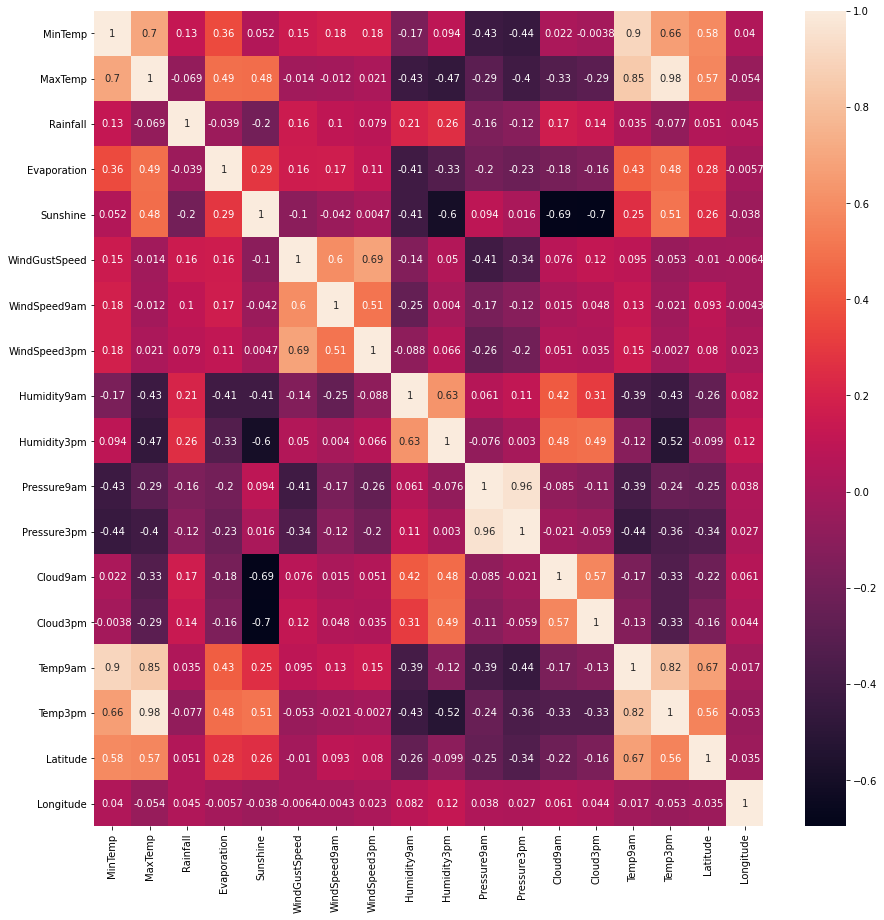

In [6]:
weather2.corr()
data= weather2.corr()
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sn.heatmap(data, annot=True)
plt.show()

In [7]:
cleandata_weather2= pd.DataFrame(weather2)
cleandata_weather2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
1827,2014-03-01,Albury,17.0,27.2,8.8,NaN,NaN,NE,50.0,NaN,...,1020.9,1018.0,8.0,6.0,18.5,25.0,Yes,No,-36.08078,146.916473
1828,2014-03-02,Albury,15.8,30.0,0.0,NaN,NaN,NE,20.0,S,...,1020.5,1018.4,1.0,NaN,19.0,27.9,No,No,-36.08078,146.916473
1829,2014-03-03,Albury,15.9,32.3,0.0,NaN,NaN,SE,19.0,SSE,...,1024.0,1021.1,NaN,NaN,19.8,29.7,No,No,-36.08078,146.916473
1830,2014-03-04,Albury,15.9,32.2,0.0,NaN,NaN,SSE,41.0,SE,...,1024.5,1019.9,NaN,1.0,21.2,30.4,No,No,-36.08078,146.916473
1831,2014-03-05,Albury,19.7,31.5,0.2,NaN,NaN,N,28.0,NE,...,1017.2,1013.9,1.0,7.0,22.1,29.6,No,No,-36.08078,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145430,2017-05-27,Uluru,9.3,28.0,0.0,NaN,NaN,W,28.0,SSW,...,1019.9,1016.9,NaN,NaN,16.6,27.3,No,No,-25.34440,131.036900
145431,2017-05-28,Uluru,8.0,24.6,0.0,NaN,NaN,E,33.0,SE,...,1021.7,1018.8,4.0,NaN,13.8,23.5,No,No,-25.34440,131.036900
145432,2017-05-29,Uluru,12.7,22.2,0.0,NaN,NaN,E,37.0,E,...,1024.3,1021.7,8.0,8.0,13.9,21.0,No,No,-25.34440,131.036900
145433,2017-05-30,Uluru,9.4,22.7,0.0,NaN,NaN,E,35.0,SE,...,1026.6,1023.6,8.0,4.0,11.8,22.3,No,No,-25.34440,131.036900


In [8]:
# using three features (with highest correlated feature score): 'Humidity9am', 'Sunshine', 'Humidity3pm' to predict rainfall
three_correlated_features= cleandata_weather2[['Humidity9am', 'Sunshine', 'Humidity3pm', 'Rainfall', 'RainToday', 'Latitude', 'Longitude']]
three_correlated_features= three_correlated_features.dropna()

correlated_features = three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm', 'Latitude', 'Longitude']]
target= three_correlated_features['Rainfall']

x_tr_3, x_te_3, y_tr_3, y_te_3 = train_test_split(correlated_features, target, test_size = 0.3, random_state=42)
threeftmodel= LinearRegression()
threeftmodel.fit(x_tr_3,  y_tr_3)
threepred = threeftmodel.predict(x_te_3)


print("Score for 3 features to predict: ", threeftmodel.score(x_tr_3, y_tr_3))


# using six features: 'WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am' to predict rainfall
six_correlated_features = cleandata_weather2[['WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am', 'Rainfall', 'RainToday', 'Latitude', 'Longitude']]
six_correlated_features = six_correlated_features.dropna()

correlated_features = six_correlated_features[['WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am', 'Latitude', 'Longitude']]
target = six_correlated_features['Rainfall']

x_tr_6, x_te_6, y_tr_6, y_te_6 = train_test_split(correlated_features, target, test_size = 0.3, random_state=42)
sixftmodel= LinearRegression()
sixftmodel.fit(x_tr_6, y_tr_6)
sixpred = sixftmodel.predict(x_te_6)

print("Score for 6 features to predict: ", sixftmodel.score(x_tr_6, y_tr_6))

Score for 3 features to predict:  0.10011968887460543
Score for 6 features to predict:  0.11864268545274803


In [9]:
## 3 features to predict RainToday

features= three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm']]
target= three_correlated_features['RainToday']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# This is the function we use to create the kNN model (default k=5)
model = KNeighborsClassifier()

# TODO fit the model using the train data
model.fit(x_train, y_train)

# TODO store the predictions for the test sets
predictions =  model.predict(x_test)
from sklearn.metrics import accuracy_score
print("sklearn's 3 features accuracy score for RainToday:", accuracy_score(y_test, predictions) )

## 6 features to predict RainToday
features= six_correlated_features[['WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am']]
target= six_correlated_features['RainToday']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions =  model.predict(x_test)
from sklearn.metrics import accuracy_score
print("sklearn's 6 features accuracy score for RainToday:", accuracy_score(y_test, predictions) )

sklearn's 3 features accuracy score for RainToday: 0.7830188679245284
sklearn's 6 features accuracy score for RainToday: 0.7893518518518519


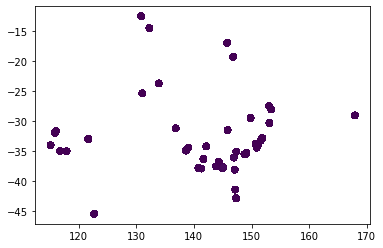

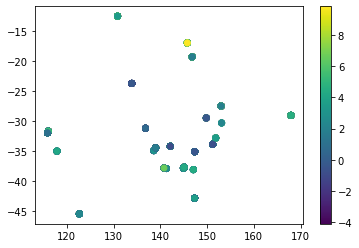

In [10]:
# 2D Scatter Plot

fig = plt.figure()
ax = fig.add_subplot(111)
x1 = cleandata_weather2['Longitude']
x2 = cleandata_weather2['Latitude']
plt.scatter(x1,  x2, c=cleandata_weather2['Rainfall'])

# 3 features 
fig = plt.figure()
ax = fig.add_subplot(111)
x3_1 = x_te_3['Longitude']
x3_2 = x_te_3['Latitude']
x3_3 = threepred
plt.scatter(x3_1,  x3_2, c=x3_3)
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


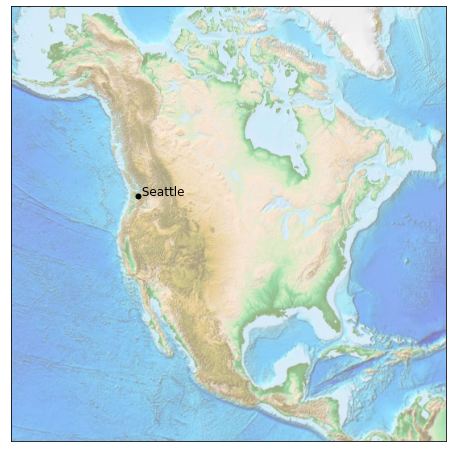

In [19]:

import os
os.environ["PROJ_LIB"] = "C:\Anaconda\Library\share"; 
from mpl_toolkits.basemap import Basemap


fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


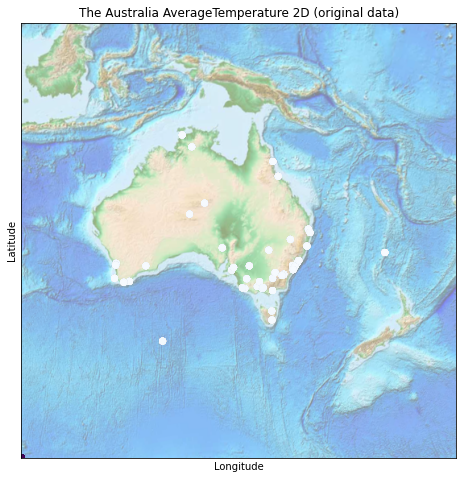

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


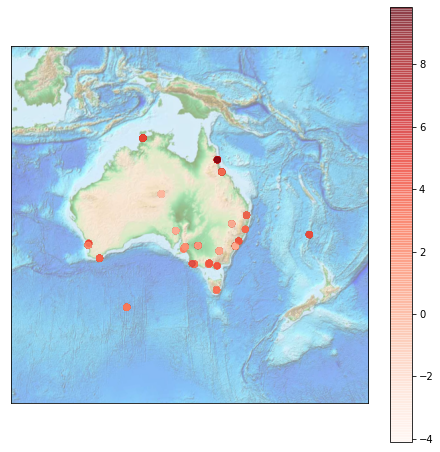

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


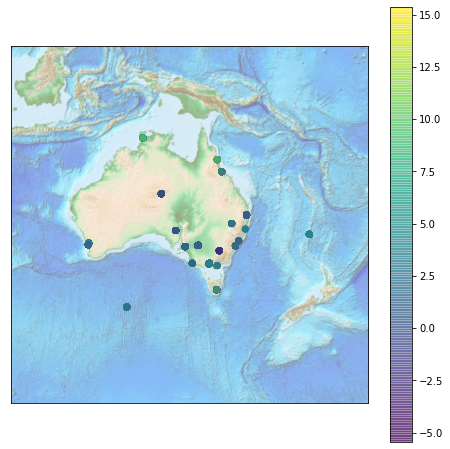

In [53]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-30, lon_0=140,)
m.etopo(scale=0.5, alpha=0.5)


# map Rainfall for plotting
x1 = cleandata_weather2['Longitude']
x2 = cleandata_weather2['Latitude']
plt.scatter(x1,  x2, c=cleandata_weather2['Rainfall'].values.ravel() )


m.scatter(x1, x2, latlon=True,
          c=cleandata_weather2['Rainfall'], 
          cmap='Blues', alpha=0.5)
plt.title('The Australia AverageTemperature 2D (original data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 3 features 
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-30, lon_0=140,)
m.etopo(scale=0.5, alpha=0.5)
x3_1 = x_te_3['Longitude']
x3_2 = x_te_3['Latitude']
x3_3 = threepred
m.scatter(x3_1, x3_2, latlon=True,
          c=x3_3, 
          cmap='Reds', alpha=0.5)
plt.colorbar()
plt.show()

# 6 features 
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-30, lon_0=140,)
m.etopo(scale=0.5, alpha=0.5)
x6_1 = x_te_6['Longitude']
x6_2 = x_te_6['Latitude']
x6_3 = sixpred
m.scatter(x6_1, x6_2, latlon=True,
          c=x6_3, 
          cmap='viridis', alpha=0.5)
plt.colorbar()
plt.show()